<a href="https://colab.research.google.com/github/Gabriel-010101/1TSCG---LuxodoLixo-LL-/blob/main/rascunho_checkpoint1_alcides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

## Carregar módulos

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

Giovanna Shiguemori -
Isabela Romanato -
Gabriel Amtoniette -
Larissa Santana 

## Questão 1

1 – Quantos países existem no banco de dados?


In [ ]:
len(dados_covid['country'].unique())

201

Listar os países para selecionar quais são países

In [ ]:
dados_covid['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

201-4 = 197




2 – Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?


In [ ]:
dados_covid[(dados_covid['country'].isin(['Brazil', 'Italy', 'US'])) & (dados_covid['date']=='2023-03-09')]

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836


3 – Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores
mortes?

10 MAIORES PAÍSES INFECTADOS

In [ ]:
cols = ['country', 'infected']
dados_covid [cols]


,country,infected
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0
...,...,...
330322,West Bank and Gaza,703228
330323,Winter Olympics 2022,535
330324,Yemen,11945
330325,Zambia,343135


In [ ]:
maiores_valores_infectados = dados_covid.sort_values('infected', ascending = False)

In [ ]:
maiores_valores_infectados

,province,country,Lat,Long,date,infected,dead
330298,NaN,US,40.00000,-100.000000,2023-03-09,103802702,1123836
330009,NaN,US,40.00000,-100.000000,2023-03-08,103755771,1123246
329720,NaN,US,40.00000,-100.000000,2023-03-07,103690910,1122516
329431,NaN,US,40.00000,-100.000000,2023-03-06,103655539,1122181
328853,NaN,US,40.00000,-100.000000,2023-03-04,103650837,1122172
...,...,...,...,...,...,...,...
242152,NaN,Tuvalu,-7.10950,177.649300,2022-05-08,0,0
109799,Channel Islands,United Kingdom,49.37230,-2.364400,2021-02-04,0,0
24318,Diamond Princess,Canada,0.00000,0.000000,2020-04-15,0,1
168970,NaN,Nauru,-0.52280,166.931500,2021-08-28,0,0


In [ ]:
country_infected = maiores_valores_infectados[['country','infected']]

In [ ]:
country_infected

,country,infected
330298,US,103802702
330009,US,103755771
329720,US,103690910
329431,US,103655539
328853,US,103650837
...,...,...
242152,Tuvalu,0
109799,United Kingdom,0
24318,Canada,0
168970,Nauru,0


In [ ]:
country_infected.head(10)

,country,infected
330298,US,103802702
330009,US,103755771
329720,US,103690910
329431,US,103655539
328853,US,103650837
328564,US,103648690
329142,US,103646975
328275,US,103589757
327986,US,103533872
327697,US,103443455


**Resposta:** O país que possui maior número de infectados é US.

10 MAIORES MORTES 

In [ ]:
cols = ['country', 'dead']
dados_covid [cols]

,country,dead
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0
...,...,...
330322,West Bank and Gaza,5708
330323,Winter Olympics 2022,0
330324,Yemen,2159
330325,Zambia,4057


In [ ]:
maiores_mortes = dados_covid.sort_values('dead', ascending = False)

In [ ]:
maiores_mortes

,province,country,Lat,Long,date,infected,dead
330298,NaN,US,40.0000,-100.0000,2023-03-09,103802702,1123836
330009,NaN,US,40.0000,-100.0000,2023-03-08,103755771,1123246
329720,NaN,US,40.0000,-100.0000,2023-03-07,103690910,1122516
329431,NaN,US,40.0000,-100.0000,2023-03-06,103655539,1122181
328853,NaN,US,40.0000,-100.0000,2023-03-04,103650837,1122172
...,...,...,...,...,...,...,...
110390,NaN,Vanuatu,-15.3767,166.9592,2021-02-06,1,0
110385,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.9467,-14.3559,2021-02-06,4,0
110384,Pitcairn Islands,United Kingdom,-24.3768,-128.3242,2021-02-06,0,0
110378,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2021-02-06,45,0


In [ ]:
country_dead = maiores_valores_infectados[['country','dead']]

In [ ]:
country_dead

,country,dead
330298,US,1123836
330009,US,1123246
329720,US,1122516
329431,US,1122181
328853,US,1122172
...,...,...
242152,Tuvalu,0
109799,United Kingdom,0
24318,Canada,1
168970,Nauru,0


In [ ]:
country_dead.head(10)

,country,dead
330298,US,1123836
330009,US,1123246
329720,US,1122516
329431,US,1122181
328853,US,1122172
328564,US,1122165
329142,US,1122134
328275,US,1121658
327986,US,1120897
327697,US,1119917


**Resposta:** O país que possui maior número de infectados é US.

4 –Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que  possuem  maiores  valores  desta  taxa?Você  acredita  que  a  taxa  de  mortalidade  uma  boa métrica? Quais vieses você conseguiu perceber?

In [ ]:
date_recent = dados_covid[(dados_covid['date']=='2023-03-09')]

In [ ]:
dados_covid = date_recent

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330038,NaN,Afghanistan,33.939110,67.709953,2023-03-09,209451,7896,26.526216
330039,NaN,Albania,41.153300,20.168300,2023-03-09,334457,3598,92.956365
330040,NaN,Algeria,28.033900,1.659600,2023-03-09,271496,6881,39.455893
330041,NaN,Andorra,42.506300,1.521800,2023-03-09,47890,165,290.242424
330042,NaN,Angola,-11.202700,17.873900,2023-03-09,105288,1933,54.468702
...,...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708,123.200420
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0,inf
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,5.532654
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057,84.578506


In [ ]:
dados_covid ['taxa_mortalidade'] = np.array(dados_covid['infected']/dados_covid['dead'] )

<ipython-input-40-1f5d3fd5e5fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_covid ['taxa_mortalidade'] = (dados_covid['infected']/dados_covid['dead'] )


In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330038,NaN,Afghanistan,33.939110,67.709953,2023-03-09,209451,7896,26.526216
330039,NaN,Albania,41.153300,20.168300,2023-03-09,334457,3598,92.956365
330040,NaN,Algeria,28.033900,1.659600,2023-03-09,271496,6881,39.455893
330041,NaN,Andorra,42.506300,1.521800,2023-03-09,47890,165,290.242424
330042,NaN,Angola,-11.202700,17.873900,2023-03-09,105288,1933,54.468702
...,...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708,123.200420
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0,inf
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,5.532654
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057,84.578506


In [ ]:
cols = ['country', 'taxa_mortalidade']
dados_covid [cols]


,country,taxa_mortalidade
330038,Afghanistan,26.526216
330039,Albania,92.956365
330040,Algeria,39.455893
330041,Andorra,290.242424
330042,Angola,54.468702
...,...,...
330322,West Bank and Gaza,123.200420
330323,Winter Olympics 2022,inf
330324,Yemen,5.532654
330325,Zambia,84.578506


In [ ]:
dados_covid.sort_values('taxa_mortalidade', ascending = False)

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330182,NaN,Holy See,41.902900,12.453400,2023-03-09,29,0,inf
330314,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,2023-03-09,2166,0,inf
330081,Grand Princess,Canada,0.000000,0.000000,2023-03-09,13,0,inf
330113,Jiangsu,China,32.971100,119.455000,2023-03-09,5075,0,inf
330297,NaN,Tuvalu,-7.109500,177.649300,2023-03-09,2805,0,inf
...,...,...,...,...,...,...,...,...
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,5.532654
330213,NaN,MS Zaandam,0.000000,0.000000,2023-03-09,9,2,4.500000
330199,NaN,"Korea, North",40.339900,127.510100,2023-03-09,1,6,0.166667
330080,Diamond Princess,Canada,0.000000,0.000000,2023-03-09,0,1,0.000000


## **RESPONDER PERGUNTAS: "Você  acredita  que  a  taxa  de  mortalidade  uma  boa métrica? Quais vieses você conseguiu perceber?" E CORRIGIR INF**

5 – Gere os seguintes gráficos:


a) Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados 
Unidos.

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330038,NaN,Afghanistan,33.939110,67.709953,2023-03-09,209451,7896,26.526216
330039,NaN,Albania,41.153300,20.168300,2023-03-09,334457,3598,92.956365
330040,NaN,Algeria,28.033900,1.659600,2023-03-09,271496,6881,39.455893
330041,NaN,Andorra,42.506300,1.521800,2023-03-09,47890,165,290.242424
330042,NaN,Angola,-11.202700,17.873900,2023-03-09,105288,1933,54.468702
...,...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708,123.200420
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0,inf
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159,5.532654
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057,84.578506


In [ ]:
dados_brazil_us = dados_covid[dados_covid['country'].isin(['Brazil', 'US'])]

In [ ]:
dados_brazil_us

,province,country,Lat,Long,date,infected,dead,taxa_mortalidade
330069,NaN,Brazil,-14.235,-51.9253,2023-03-09,37076053,699276,53.020628
330298,NaN,US,40.000,-100.0000,2023-03-09,103802702,1123836,92.364635


In [ ]:
#por país 

dados_brazil_us.groupby('country').agg(media_infected = pd.NamedAgg('infected', 'mean'))

,media_infected
country,
Brazil,37076053.0
US,103802702.0


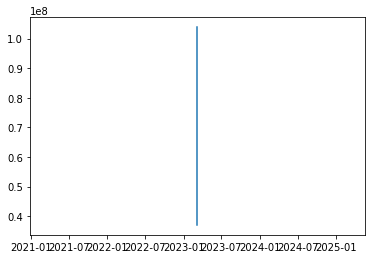

In [ ]:
plt.plot( dados_brazil_us['date'], dados_brazil_us['infected'])